In [2]:
import sys
sys.path.append('C:/Users/HP/Desktop/Workshop_1/src')  
from db_connection import conn

import pandas as pd

# Verificar la conexión y cargar los datos desde la base de datos
query = "SELECT * FROM candidates"
df = pd.read_sql(query, con=conn.engine)

# Mostrar las primeras filas del DataFrame
df.head()


,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [3]:
# Información general del DataFrame
df.info()

# Estadísticas descriptivas del DataFrame
df.describe()

# Verificar si hay valores nulos en las columnas
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


First Name                   0
Last Name                    0
Email                        0
Application Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code Challenge Score         0
Technical Interview Score    0
dtype: int64

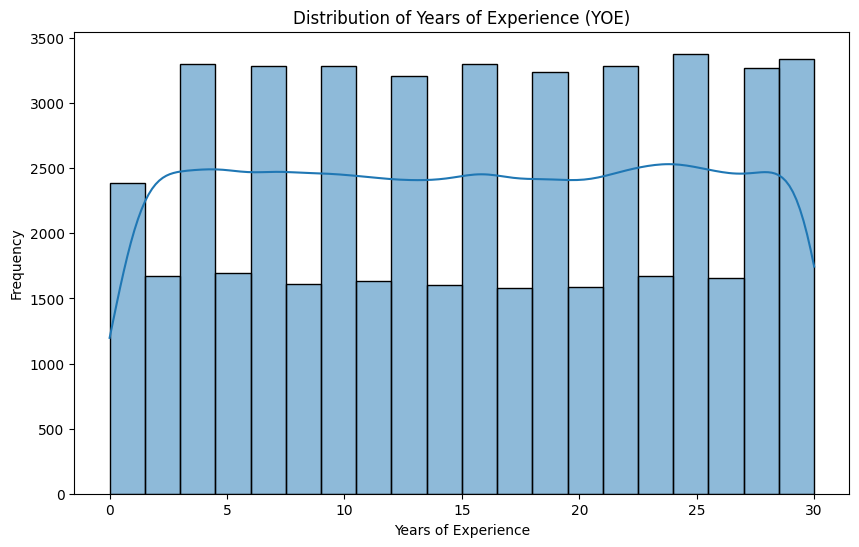

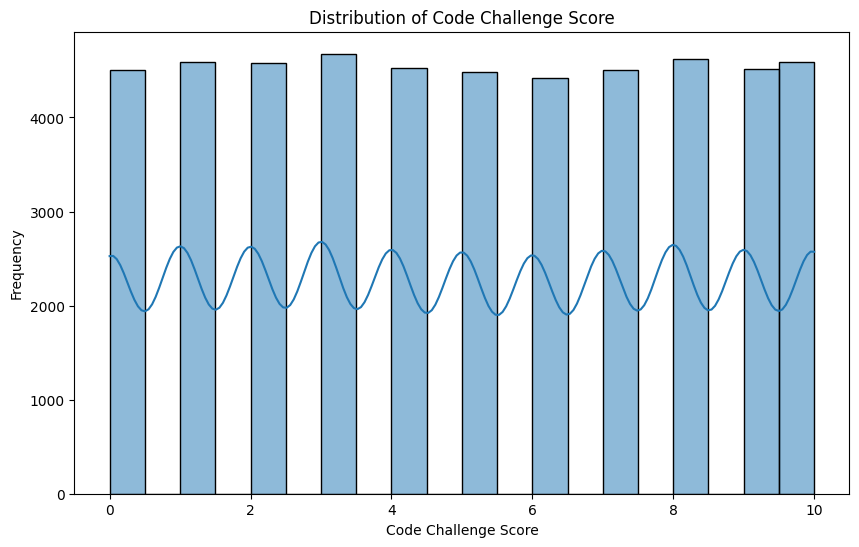

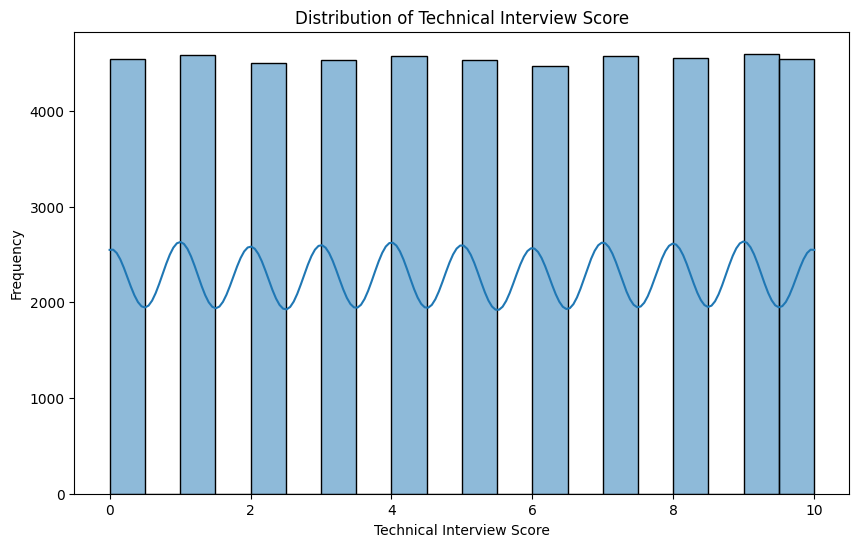

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para Years of Experience (YOE)
plt.figure(figsize=(10, 6))
sns.histplot(df['YOE'], bins=20, kde=True)
plt.title('Distribution of Years of Experience (YOE)')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

# Histograma para Code Challenge Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Code Challenge Score'], bins=20, kde=True)
plt.title('Distribution of Code Challenge Score')
plt.xlabel('Code Challenge Score')
plt.ylabel('Frequency')
plt.show()

# Histograma para Technical Interview Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Technical Interview Score'], bins=20, kde=True)
plt.title('Distribution of Technical Interview Score')
plt.xlabel('Technical Interview Score')
plt.ylabel('Frequency')
plt.show()



In [33]:
# Convertir Application Date a datetime
df['Application Date'] = pd.to_datetime(df['Application Date'])

# Crear una columna 'Hired' basada en la condición dada
df['Hired'] = (df['Code Challenge Score'] >= 7) & (df['Technical Interview Score'] >= 7)

# Mostrar las primeras filas del DataFrame corregido
df.head()


,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score,Hired,Year
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,False,2021
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,False,2021
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,True,2020
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,False,2020
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,True,2020


In [36]:
import pandas as pd

import pandas as pd

def assign_group(technology):
    if technology in ['Development - CMS Backend', 'Development - CMS Frontend', 'Development - FullStack', 'Development - Frontend', 'Development - Backend', 'Game Development', 'DevOps', 'Adobe Experience Manager']:
        return 'Development'
    elif technology in ['QA Automation', 'QA Manual']:
        return 'Quality Assurance'
    elif technology in ['System Administration', 'Security Compliance', 'Security']:
        return 'Security'
    elif technology in ['Database Administration', 'Data Engineer', 'Business Intelligence', 'Business Analytics / Project Management']:
        return 'Data & Analytics'
    elif technology in ['Salesforce', 'Sales', 'Client Success']:
        return 'Sales and Business'
    elif technology in ['Social Media Community Management', 'Mulesoft', 'Technical Writing']:
        return 'Marketing and Communication'
    elif technology == 'Design':
        return 'Design'
    else:
        return 'Other'

# Crear la nueva columna
df['group_technology'] = df['Technology'].apply(assign_group)

df.head()


,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score,Hired,Year,group_technology
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,False,2021,Data & Analytics
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,False,2021,Data & Analytics
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,True,2020,Sales and Business
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,False,2020,Quality Assurance
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,True,2020,Marketing and Communication


In [37]:
# Contar el número de registros en 'Other'
count_other = df[df['group_technology'] == 'Other'].shape[0]

print(f"El número de registros en 'Other' es: {count_other}")


El número de registros en 'Other' es: 0


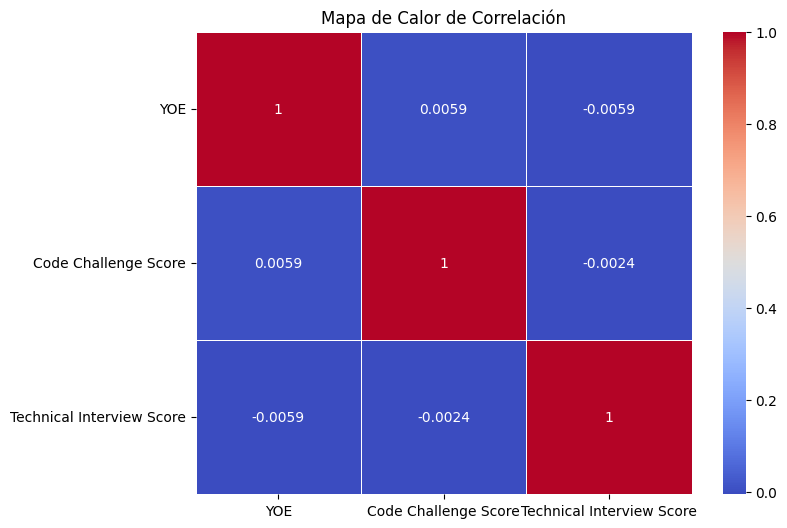

In [9]:
# Filtrar solo las columnas numéricas
df_numeric = df[['YOE', 'Code Challenge Score', 'Technical Interview Score']]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

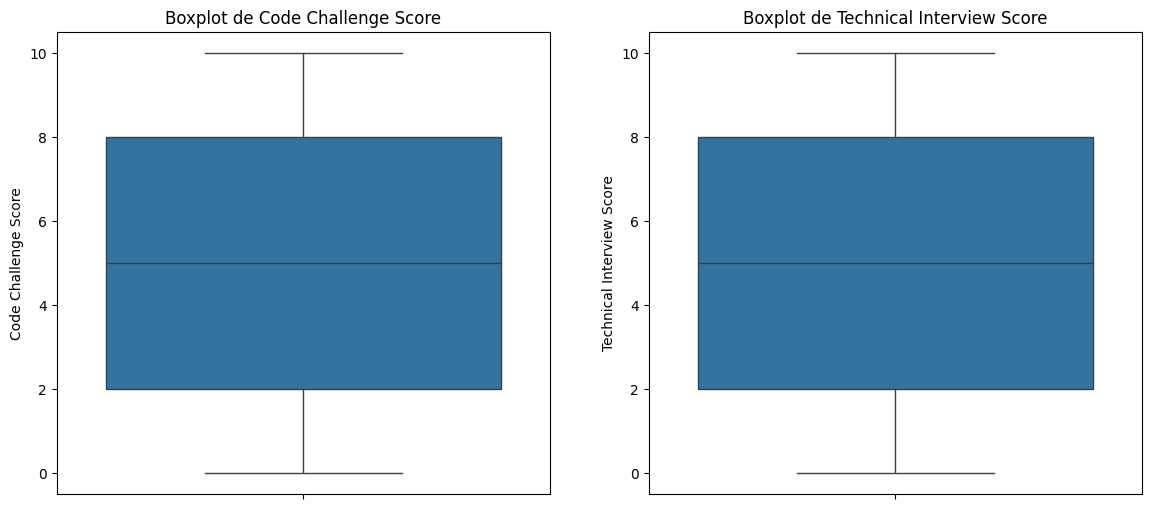

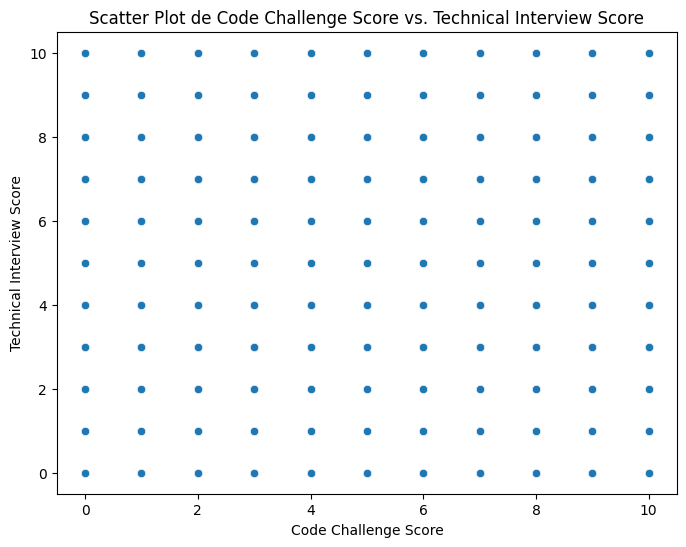

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que los gráficos se muestren en una sola figura
plt.figure(figsize=(14, 6))

# Diagrama de Caja para 'Code Challenge Score'
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Code Challenge Score'])
plt.title('Boxplot de Code Challenge Score')

# Diagrama de Caja para 'Technical Interview Score'
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Technical Interview Score'])
plt.title('Boxplot de Technical Interview Score')

plt.show()

# Diagrama de Dispersión entre 'Code Challenge Score' y 'Technical Interview Score'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Code Challenge Score', y='Technical Interview Score', data=df)
plt.title('Scatter Plot de Code Challenge Score vs. Technical Interview Score')
plt.show()


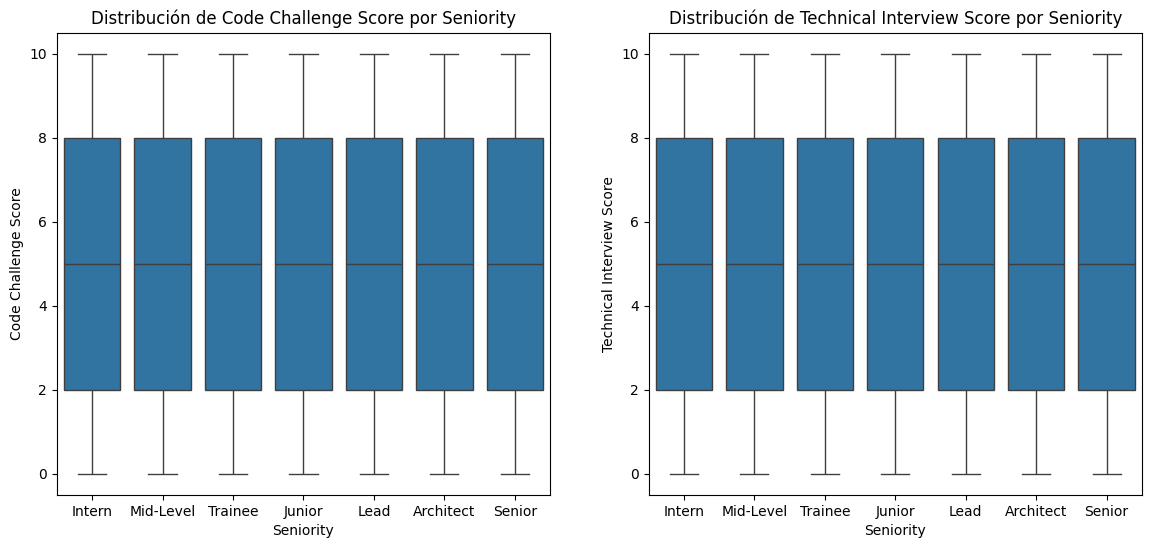

In [15]:
# Graficar la distribución de los puntajes por nivel de seniority
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Seniority', y='Code Challenge Score', data=df)
plt.title('Distribución de Code Challenge Score por Seniority')

plt.subplot(1, 2, 2)
sns.boxplot(x='Seniority', y='Technical Interview Score', data=df)
plt.title('Distribución de Technical Interview Score por Seniority')

plt.show()


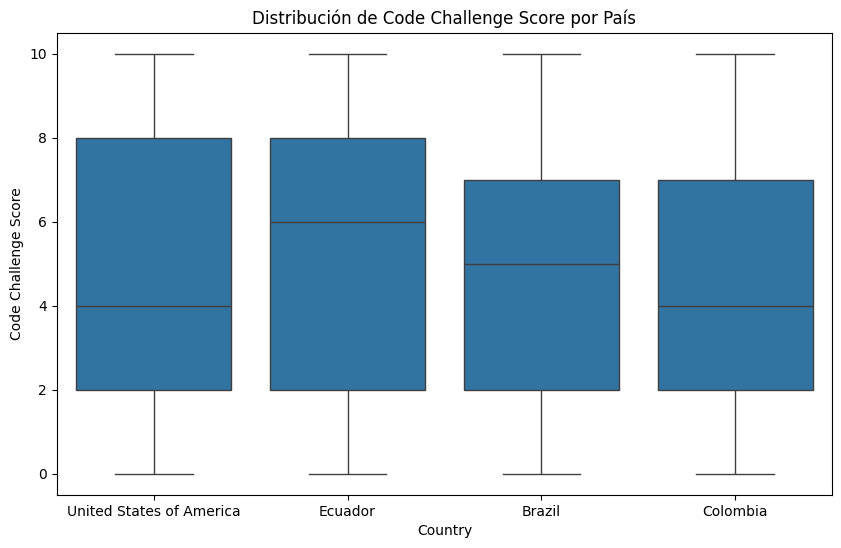

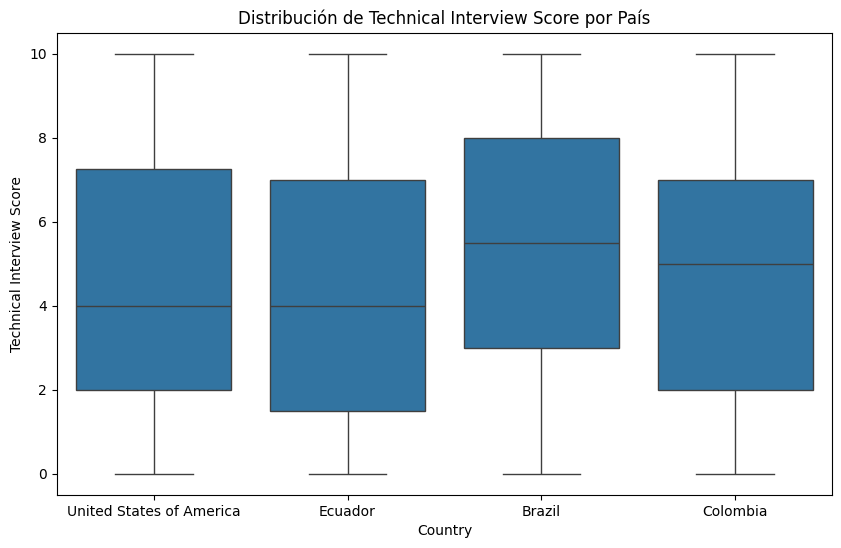

In [39]:
# Filtrar los países de interés
countries_of_interest = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']
df_filtered = df[df['Country'].isin(countries_of_interest)]

# Graficar los puntajes por país
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Code Challenge Score', data=df_filtered)
plt.title('Distribución de Code Challenge Score por País')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Technical Interview Score', data=df_filtered)
plt.title('Distribución de Technical Interview Score por País')
plt.show()


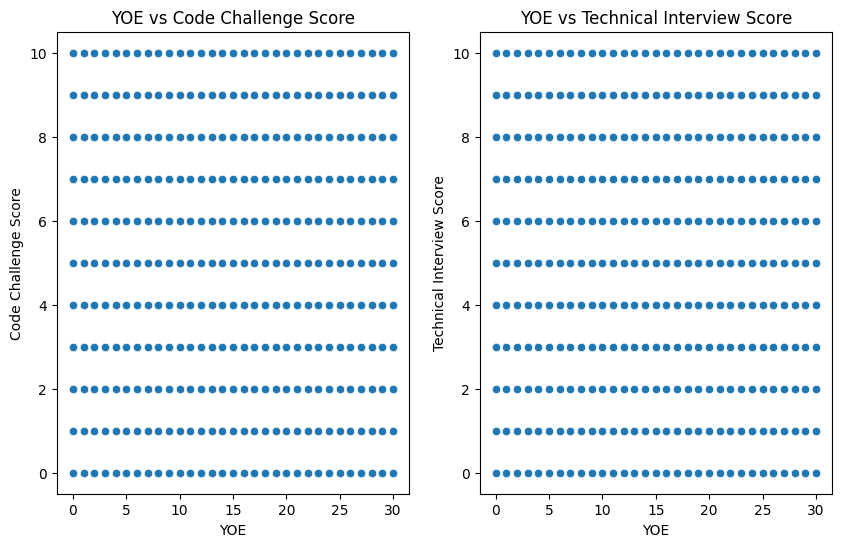

In [17]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='YOE', y='Code Challenge Score', data=df)
plt.title('YOE vs Code Challenge Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='YOE', y='Technical Interview Score', data=df)
plt.title('YOE vs Technical Interview Score')

plt.show()


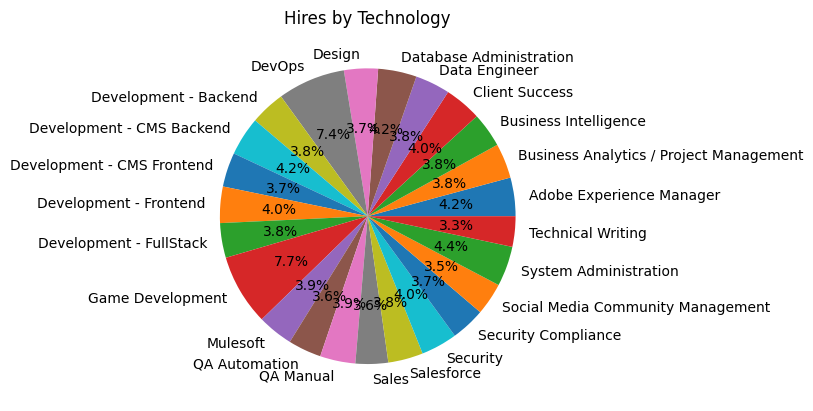

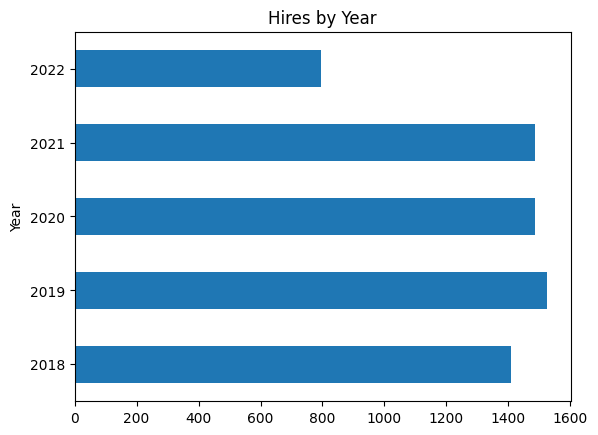

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Example: Hires by Technology (Pie Chart)
tech_hires = df[df['Hired']].groupby('Technology').size()
tech_hires.plot(kind='pie', autopct='%1.1f%%')
plt.title('Hires by Technology')
plt.show()

# Example: Hires by Year (Horizontal Bar Chart)
df['Year'] = df['Application Date'].dt.year
year_hires = df[df['Hired']].groupby('Year').size()
year_hires.plot(kind='barh')
plt.title('Hires by Year')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_9056\2814700717.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seniority_hires.index, y=seniority_hires.values, palette='viridis')


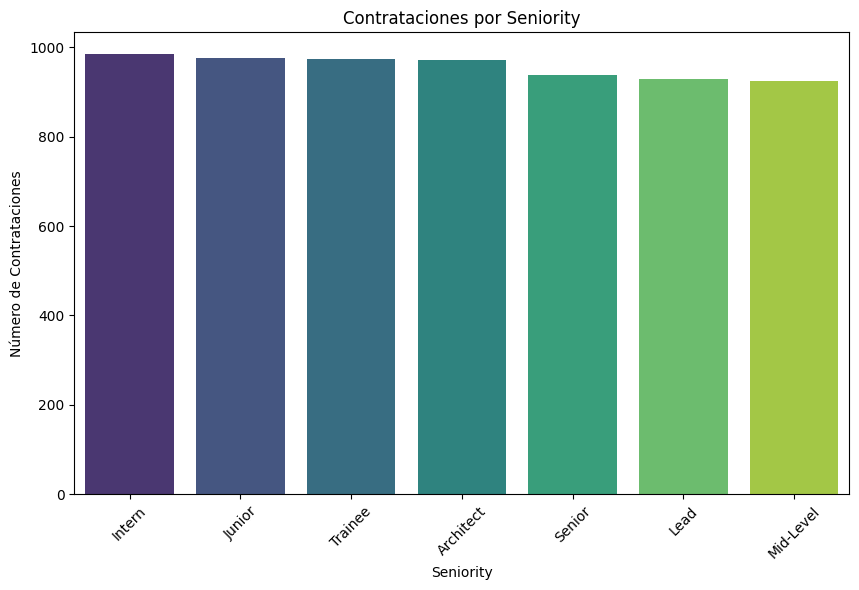

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los candidatos contratados
df_hired = df[df['Hired']]

# Contar el número de contrataciones por nivel de seniority
seniority_hires = df_hired['Seniority'].value_counts()

# Graficar el número de contrataciones por seniority
plt.figure(figsize=(10, 6))
sns.barplot(x=seniority_hires.index, y=seniority_hires.values, palette='viridis')
plt.title('Contrataciones por Seniority')
plt.xlabel('Seniority')
plt.ylabel('Número de Contrataciones')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x800 with 0 Axes>

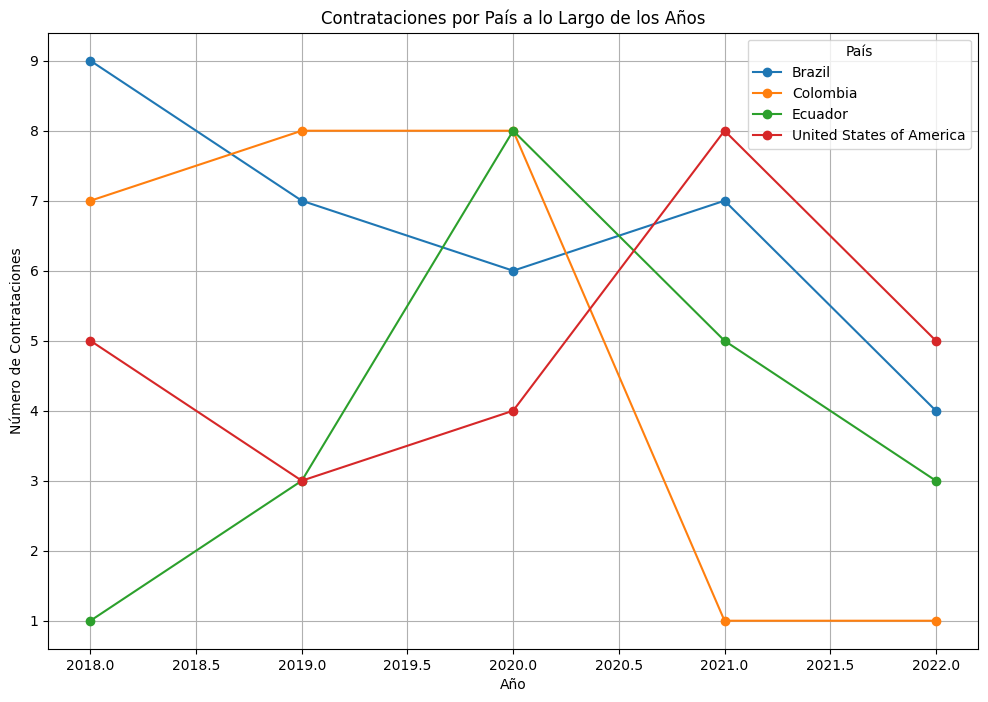

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarse de que la columna 'Year' es un entero
df['Year'] = df['Year'].astype(int)

# Filtrar los países de interés
countries_of_interest = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']
df_country_hires = df_hired[df_hired['Country'].isin(countries_of_interest)]

# Contar contrataciones por país y por año
country_year_hires = df_country_hires.groupby(['Year', 'Country']).size().unstack()

# Graficar las contrataciones por país a lo largo de los años
plt.figure(figsize=(12, 8))
country_year_hires.plot(marker='o', figsize=(12, 8))
plt.title('Contrataciones por País a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Número de Contrataciones')
plt.grid(True)
plt.legend(title='País')
plt.show()



In [44]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd

# Asegúrate de que la columna 'Application Date' esté en formato datetime
df['Application Date'] = pd.to_datetime(df['Application Date'])
df['Year'] = df['Application Date'].dt.year.astype(int)

# Filtrar los candidatos contratados
df_hired = df[df['Hired']]

# Gráfico 1: Hires by Technology (Pie Chart)
tech_hires = df_hired.groupby('group_technology').size()
fig1 = px.pie(values=tech_hires.values, names=tech_hires.index, title='Hires by Technology')

# Gráfico 2: Hires by Year (Horizontal Bar Chart)
year_hires = df_hired.groupby('Year').size()
fig2 = px.bar(year_hires, x=year_hires.values, y=year_hires.index, orientation='h', title='Hires by Year')

# Gráfico 3: Contrataciones por Seniority (Bar Chart)
seniority_hires = df_hired['Seniority'].value_counts()
fig3 = px.bar(seniority_hires, x=seniority_hires.index, y=seniority_hires.values, title='Contrataciones por Seniority')

# Gráfico 4: Contrataciones por País a lo Largo de los Años (Multiline Chart)
countries_of_interest = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']
df_country_hires = df_hired[df_hired['Country'].isin(countries_of_interest)]
country_year_hires = df_country_hires.groupby(['Year', 'Country']).size().unstack()

fig4 = px.line(country_year_hires, x=country_year_hires.index, y=country_year_hires.columns, 
               labels={"value": "Número de Contrataciones", "variable": "País"},
               title='Contrataciones por País a lo Largo de los Años')

# Crear el tablero con el tipo adecuado para el gráfico de pastel
fig = make_subplots(rows=2, cols=2, subplot_titles=("Hires by Technology", "Hires by Year", 
                                                    "Contrataciones por Seniority", "Contrataciones por País"),
                    specs=[[{'type': 'domain'}, {'type': 'xy'}],  # 'domain' para el gráfico de pastel
                           [{'type': 'xy'}, {'type': 'xy'}]])

# Añadir los gráficos al tablero
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig3['data'][0], row=2, col=1)
for trace in fig4['data']:
    fig.add_trace(trace, row=2, col=2)

# Actualizar el layout
fig.update_layout(height=800, width=1000, title_text="Resumen de Contrataciones")
fig.show()



In [26]:
print(df.head())


   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   Code Challenge Score  Technical Interview Score  Hired  Year  
0                     3                          3  False  2021  
1                     2               

In [43]:
 #Guardar el DataFrame limpio de nuevo en la base de datos
df.to_sql('candidates_clean', conn.engine, if_exists='replace', index=False)

print("El DataFrame limpio ha sido guardado exitosamente en la base de datos PostgreSQL.")

El DataFrame limpio ha sido guardado exitosamente en la base de datos PostgreSQL.
